In [1]:
using Pkg
Pkg.activate("../..")

  Activating environment at `~/Documents/repos/nanoOpt.jl/Project.toml`


In [2]:
using Images,Plots; pyplot()

┌ Warning: backend `PyPlot` is not installed.
└ @ Plots /home/martinez/.julia/packages/Plots/io9zQ/src/backends.jl:43


Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

efieldC (generic function with 2 methods)

In [4]:
λ = 650
k₀ = 2π/λ

mat1 = material(1.33^2,1.0)
mat2 = material(1.0,1.0);

k = mat1.k(k₀);

In [5]:
k

0.012856363782382847

In [6]:
image = load("micron.png") .|> Gray

image = Float64.(1.0 .-image);

nx,ny = size(image)

scale = 7

x,y = ((1:nx) .- 0.5*nx)*scale, ((1:ny) .- 0.5*ny)*scale;

In [7]:
dip1 = [0.,0.,1.]
pos = [0.,0.,-10.]
dip = dipole(mat1,k₀,pos,dip1);

In [8]:
p = dip
npad = 2

2

# Electric field

In [9]:
 e = eplane(p,x,y, npad, 0.0);

In [10]:
f,_ = fourier2(x,y,image,npad*nx,npad*ny)
ie,_ = fourier2(x,y,e,npad*nx,npad*ny);

In [11]:
ie[:,:,1] = ie[:,:,1] .* f
ie[:,:,2] = ie[:,:,2] .* f
ie[:,:,3] = ie[:,:,3] .* f;

In [12]:
e0 = ifourier2(x,y,ie);

In [13]:
angular = Angular(x,y,e0, mat1, k₀,1,npad);

## Lens Image far field

In [14]:
fl = far(angular)
plotsNA = []
NAa = [0.8,1.0,1.3]

for NA ∈ NAa
    lens=lensimage2(angular,mat2,NA)
    farf = fl.far
    ef = efieldC(lens,farf)
    etr = real.(sum(conj.(ef).*ef,dims=3)[:,:,1])
    p = heatmap(etr,yflip=true,xlabel="X [nm]",ylabel="Y [nm]",title="NA="*string(NA), colorbar=:none)
    push!(plotsNA,p)
end

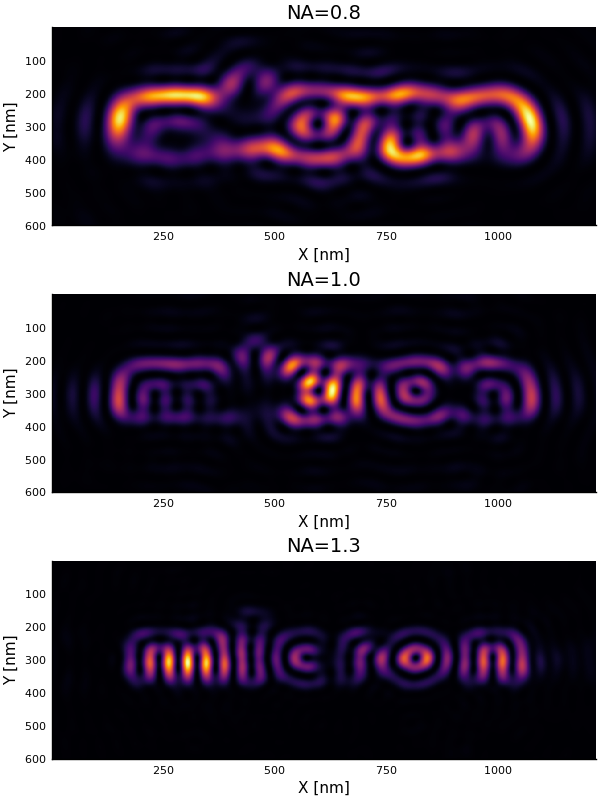

In [15]:
plot(plotsNA...,layout=(3,1),size=(600,800))